In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [5]:
df = pd.read_csv("/kaggle/input/indian-startup-funding/startup_funding.csv") 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [7]:
df.drop(columns=['Remarks'], inplace = True)

In [8]:
df.set_index('Sr No', inplace = True)

In [9]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [10]:
df.rename(
    columns = {
        'Date dd/mm/yyyy' : 'Date',
        'Industry Vertical' : 'Vertical',
        'City  Location' : 'City',
        'InvestmentnType' : 'Round',
        'Amount in USD' : 'Amount',
        'Investors Name' : 'Investor',  
    },
    inplace = True
)

In [11]:
df.head()

,Date,Startup Name,Vertical,SubVertical,City,Investor,Round,Amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          3044 non-null   object
 1   Startup Name  3044 non-null   object
 2   Vertical      2873 non-null   object
 3   SubVertical   2108 non-null   object
 4   City          2864 non-null   object
 5   Investor      3020 non-null   object
 6   Round         3040 non-null   object
 7   Amount        2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [13]:
df['Amount'] = df['Amount'].fillna(0)

In [14]:
df['Amount'] = df['Amount'].str.replace(',','')
df['Amount'] = df['Amount'].str.replace('undisclosed','0')
df['Amount'] = df['Amount'].str.replace('unknown','0')
df['Amount'] = df['Amount'].str.replace('Undisclosed','0')
df['Amount'] = df['Amount'].fillna(0).astype(str)

In [15]:
df=  df[df['Amount'].str.isdigit()]

In [16]:
df['Amount'] = df['Amount'].astype('float')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3029 non-null   object 
 1   Startup Name  3029 non-null   object 
 2   Vertical      2858 non-null   object 
 3   SubVertical   2104 non-null   object 
 4   City          2849 non-null   object 
 5   Investor      3005 non-null   object 
 6   Round         3027 non-null   object 
 7   Amount        3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [18]:
def to_inr(dollar):
    return dollar*87.99/10000000

In [19]:
df['Amount'] = df['Amount'].apply(to_inr)

In [20]:
df.rename(
    columns = {
        'Amount' : 'Amount in Cr',
    },
    inplace = True
)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3029 non-null   object 
 1   Startup Name  3029 non-null   object 
 2   Vertical      2858 non-null   object 
 3   SubVertical   2104 non-null   object 
 4   City          2849 non-null   object 
 5   Investor      3005 non-null   object 
 6   Round         3027 non-null   object 
 7   Amount in Cr  3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [22]:
df['Date'] = df['Date'].str.replace('05/072018','05/07/2018')
df['Date'] = df['Date'].str.replace('01/07/015','01/07/2015')

In [23]:
df.tail()

,Date,Startup Name,Vertical,SubVertical,City,Investor,Round,Amount in Cr
Sr No,,,,,,,,
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,39.595500
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,7.259175
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,13.198500
3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0.000000
3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,1.231860


In [24]:
df['Date'] = pd.to_datetime(df['Date'],errors = 'coerce', dayfirst=True)

In [25]:
df['Date'].isna().value_counts()

Date
False    3024
True        5
Name: count, dtype: int64

In [26]:
df = df.dropna(subset = ['Date','Vertical','City','Investor','Round', 'Amount in Cr'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2820 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2820 non-null   datetime64[ns]
 1   Startup Name  2820 non-null   object        
 2   Vertical      2820 non-null   object        
 3   SubVertical   2078 non-null   object        
 4   City          2820 non-null   object        
 5   Investor      2820 non-null   object        
 6   Round         2820 non-null   object        
 7   Amount in Cr  2820 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.3+ KB


In [28]:
df.to_csv('startup_cleaned.csv', index = False)

In [29]:
sorted(set(df['Investor'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [30]:
df[df['Investor'].str.contains('IDG Ventures')].head(5)[['Date','Startup Name','Vertical','City','Round','Amount in Cr']]

,Date,Startup Name,Vertical,City,Round,Amount in Cr
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,31.600509
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,1055.880000
259,2018-05-02,Bizongo,Consumer Internet,Mumbai,Private Equity,193.578000
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,48.394500
439,2017-12-07,eShakti,Ecommerce,Chennai,Debt Funding,20.237700


In [31]:
df[df['Investor'].str.contains('IDG Ventures')].groupby('Startup Name')['Amount in Cr'].sum().sort_values(ascending = False)

Startup Name
Cure Fit                 1055.880000
Lenskart                  527.940000
Bizongo                   219.975000
CureFit                   219.975000
Curefit                   131.985000
Fintellix                 131.985000
Xpressbees                109.987500
FirstCry.com               87.990000
Uniphore                   77.431200
POPxo                      75.671400
HealthifyMe                52.794000
\\xc2\\xa0CloudCherry      52.794000
Sigtuple                   51.034200
Flyrobe                    46.634700
RentMojo                   43.995000
Aasaanjobs                 43.995000
Vayana                     35.196000
Agrostar                   35.196000
PlaySimple                 35.196000
Blowhorn                   32.116350
Tripoto                    31.600509
Active.ai                  26.397000
Heckyl                     23.757300
CreditMantri               21.997500
eShakti                    20.237700
Zimmber                    17.598000
POPxo.com                

<Axes: ylabel='Amount in Cr'>

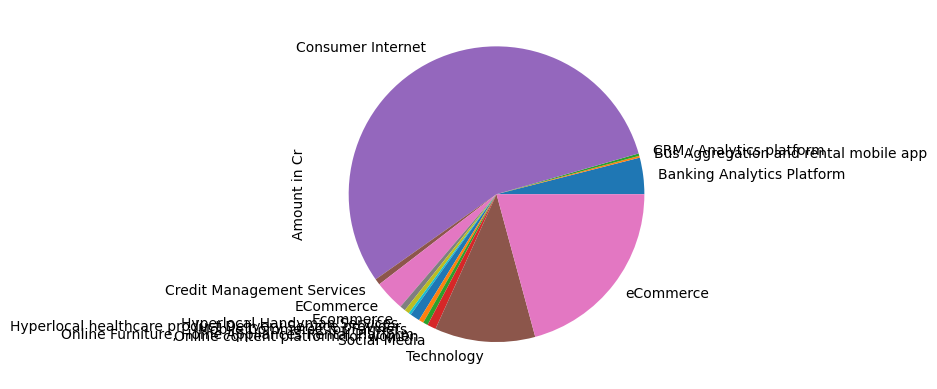

In [35]:
 df[df['Investor'].str.contains('IDG Ventures')].groupby('Vertical')['Amount in Cr'].sum().plot(kind='pie')

<Axes: ylabel='Amount in Cr'>

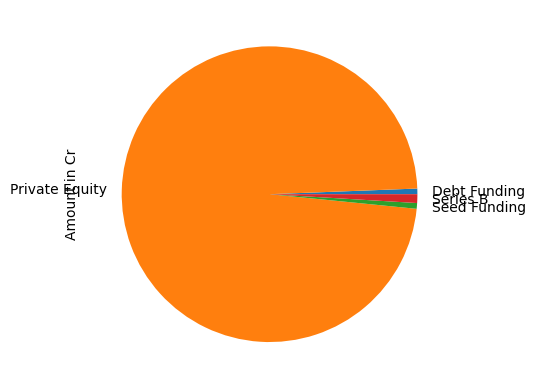

In [39]:
 df[df['Investor'].str.contains('IDG Ventures')].groupby('Round')['Amount in Cr'].sum().plot(kind='pie')